<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/3rdWeek/Tugas_ML_3_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/smt akhir/ml/income.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Encode Kategorikal
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Pisahkan Fitur dan Target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Split Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# K-NN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)

# Decision Tree Model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)

In [23]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc = roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro')
    return acc, prec, rec, f1, auc

knn_metrics = evaluate_model(y_test, y_pred_knn, y_proba_knn)
dt_metrics = evaluate_model(y_test, y_pred_tree, y_proba_tree)

# Cetak Hasil Evaluasi
print("K-Nearest Neighbors (K-NN) Results:")
print(f"Accuracy : {knn_metrics[0]:.4f}")
print(f"Precision: {knn_metrics[1]:.4f}")
print(f"Recall   : {knn_metrics[2]:.4f}")
print(f"F1 Score : {knn_metrics[3]:.4f}")
print(f"AUC      : {knn_metrics[4]:.4f}\n")

print("Decision Tree Results:")
print(f"Accuracy : {dt_metrics[0]:.4f}")
print(f"Precision: {dt_metrics[1]:.4f}")
print(f"Recall   : {dt_metrics[2]:.4f}")
print(f"F1 Score : {dt_metrics[3]:.4f}")
print(f"AUC      : {dt_metrics[4]:.4f}")

K-Nearest Neighbors (K-NN) Results:
Accuracy : 0.4721
Precision: 0.3471
Recall   : 0.3093
F1 Score : 0.3071
AUC      : 0.5914

Decision Tree Results:
Accuracy : 0.4680
Precision: 0.3880
Recall   : 0.3881
F1 Score : 0.3880
AUC      : 0.5921


Kesimpulan: Model dengan Performa Terbaik

Decision Tree adalah model yang memberikan performa lebih stabil dan unggul secara menyeluruh, terutama dalam:


*   Keseimbangan presisi dan recall (F1 Score)
*   Kemampuan klasifikasi umum (AUC)



Meskipun K-NN memiliki sedikit keunggulan dalam akurasi, itu tidak sebanding dengan kekalahan pada metrik penting lainnya. Maka, Decision Tree adalah model yang lebih baik berdasarkan hasil evaluasi ini.

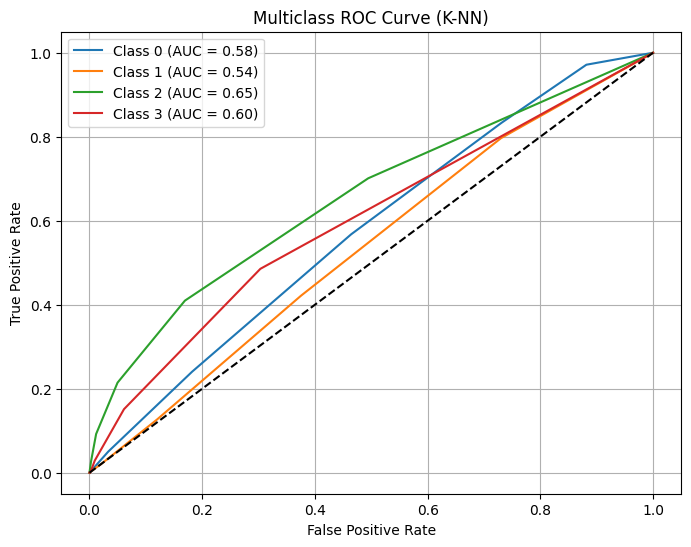

In [26]:
# Binarisasi label
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# ROC curve KNN
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC per kelas
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (K-NN)")
plt.legend()
plt.grid()
plt.show()

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Mengukur seberapa banyak prediksi yang benar dibandingkan seluruh prediksi.


Precision = TP / (TP + FP)
Mengukur seberapa akurat prediksi positif dari seluruh prediksi positif.


Recall = TP / (TP + FN)
Mengukur seberapa banyak kasus positif berhasil ditemukan.


F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
Menggabungkan precision dan recall menjadi satu metrik keseimbangan.


AUC mengukur kemampuan model membedakan kelas positif dan negatif di berbagai threshold.
Nilai mendekati 1 berarti model sangat baik.
